# KC House Data Project 

Student Name: Sanjaya Ratnayake
Student Pace: Self Paced
Scheduled Project Review Date/Time
Instructor Name: Eli Thomas

# Objective

To Develop a model that will predict housing prices in King County, WA

# Approach

Obtain: We begin by obtaining our dataset that we believe will be relevant and understanding the expectations of our stakeholders.

Scrub: Here we will scrub or prepare or data for analysis. This includes identifiying and removing null values, dealing with outliers and normalizing data.

Explore: This is the step where we will really get a feel for our data. An important part of this step is creating visualizations of our data so that we can get a clearer picture of how the variables relate to one another. In this step we will get a feel for identifying multicolinearity, identifying variables that need to be categorized, and getting a grasp of the distribution of data. 

Model: In this step we will build and edit models using all methods and procedures in our datascience skillset. This includes implementing proper algorithms to test on our data, tuning them to get better feedback, and defining paramters for goals of how well our model fits the data.

Interpret: During this step we will analyze our data, and construct it in a way that we may communicate it to its benefactors. 

# EDA Questions

Are housing costs in the KC area distributed evenly or are they bunched by prices in specific areas.

What is a quality in a home i may find unncessary if I don't want to overpay for my house ?

What are the most important factors that influence housing costs ?

# Importing Our Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

# Loading our Data and Prework

In [2]:
#Loading our raw data into a dataframe
df = pd.read_csv('kc_house_data.csv')

In [3]:
#Previewing our data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#Previewing our data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

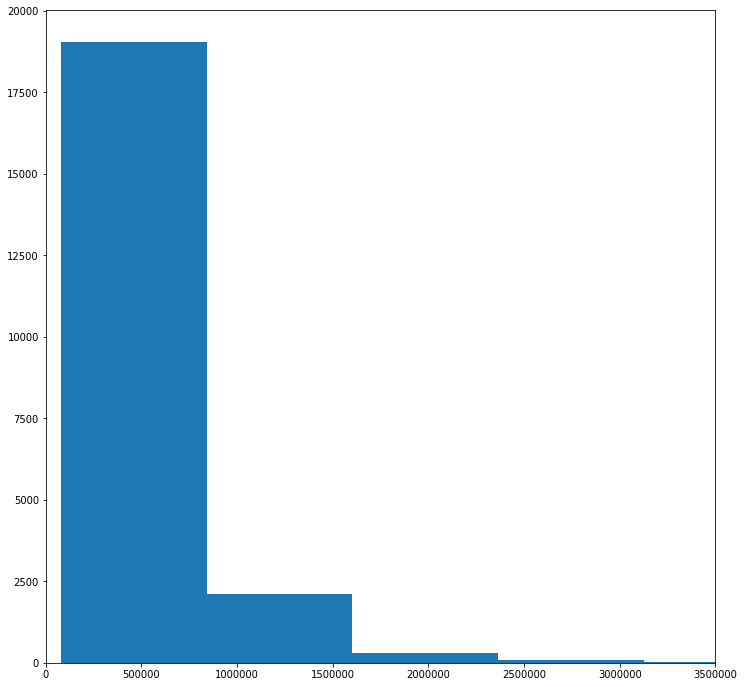

In [7]:
#histogram of our prices
plt.figure(figsize=(12,12))
plt.xlim(0, 3500000)
plt.hist(df['price'])

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


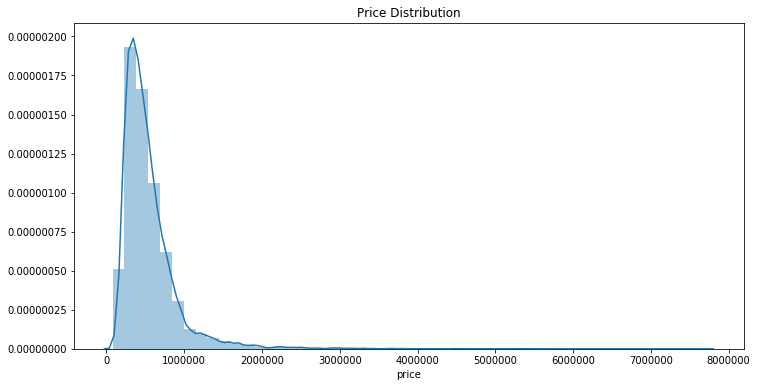

In [8]:
#distplot of our price
plt.figure(figsize=(12,6))
plt.title("Price Distribution")
sns.distplot(df['price']);

In [9]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


# Data Cleaning

#At first glance we can see that we have problems with data type. Some are categorical variables that need to be changed to objects, and specifically sqft_basement i noticed is an object that needs to be dealt with as a float or int

In [10]:
#Analyze our column

df.sqft_basement.value_counts()[:50]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
360.0        72
910.0        71
770.0        71
940.0        71
880.0        69
1200.0       69
440.0        69
290.0        69
520.0        68
350.0        68
630.0        66
920.0        66
730.0        65
960.0        65
430.0        64
740.0        64
1010.0       63
640.0        63
760.0        63
950.0        62
Name: sqft_basement, dtype: int64

Let's glance at how much of our basement column is 0, or no basement.

In [11]:
sum(df.sqft_basement == '0.0') / len(df.sqft_basement)

0.5938787794601103

Roughly 60% of our column would constitue a 'no' as a basement, with even more in question that are unknown, so we can denote this as categorical. 

Next we'll deal with null values

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

waterfront, view, and yr_renovated all contain null values

# 'waterfront', 'view' and 'yr_renovated' all contain null values - lets start with 'view' as it is our easiest to deal with... 

In [13]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [14]:
df.view.value_counts().sum()

21534

In [15]:
df.view.isna().sum()

63

In [16]:
df.view.value_counts().sum() + df.view.isna().sum()

21597

Number of values to NaN check out

As we can see we have 19422 value counts as 0, which is roughly 90% of our data... and since our missing values are so low, we can simply replace the missing values with 0's and assume minimal error

In [17]:
df['view'].fillna(0, inplace = True)

In [18]:
df.view.isna().sum()

0

# Waterfront

In [19]:
df.waterfront.isna().sum()

2376

In [20]:
df2 = df[df.waterfront==df.waterfront]

In [21]:
print(df2[df2.waterfront==0].shape, df2[df2.waterfront==1].shape)

(19075, 21) (146, 21)


As we can see only about 2% of our known houses have waterfronts, so we can safely replace them with 0's.

In [22]:
df['waterfront'].fillna(0, inplace=True)

# yr_renovated

There is no relationship between yr_renovated and the rest of the data, so we have no choice but to replace them with 0.

In [23]:
df['yr_renovated'].fillna(0, inplace=True)

# Outliers

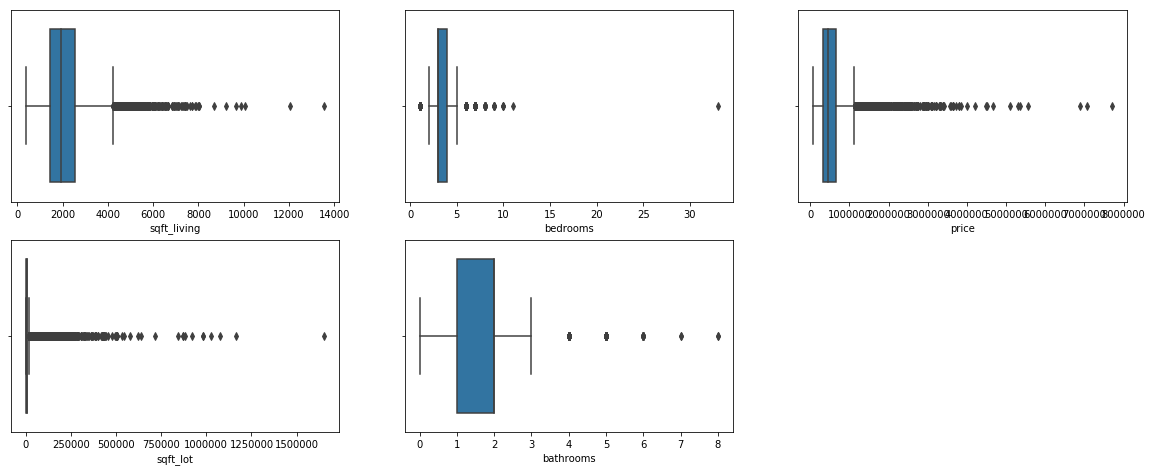

In [24]:
#boxplots to view outliers

plt.figure(figsize=(20,12))
plt.subplot(331)
sns.boxplot(df.sqft_living)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.price)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'))

In [25]:
#Remove our outliers

df = df[df.sqft_living < 8500]
df = df[df.bedrooms < 5]
df = df[df.price < 3800000]
df = df[df.sqft_lot < 600000]
df = df[df.bathrooms < 4]


In [26]:
#check the length of our DF after removals
len(df)

19475

# Identifying Relationships

# Dealing with Multicollinearity

Our next step is to deal with Multicollinearity

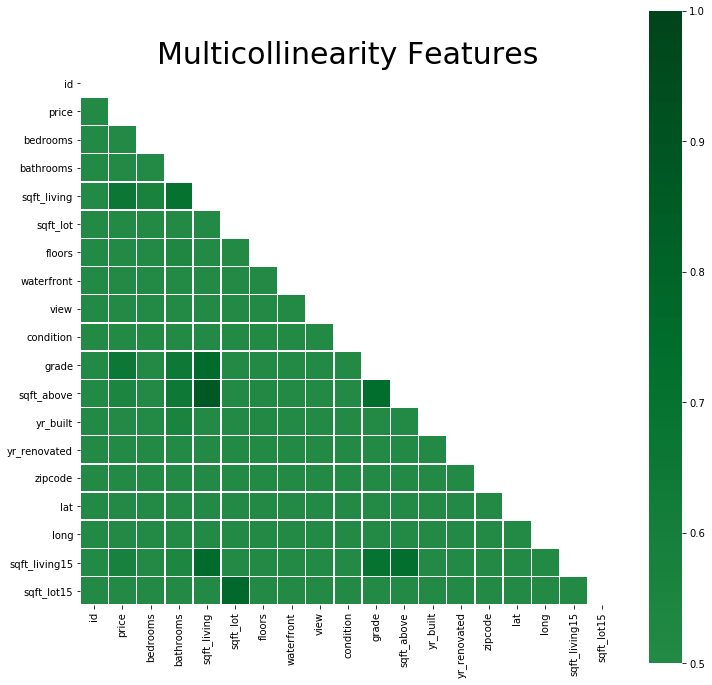

In [27]:
plt.figure(figsize=(12,12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='Greens')
plt.title('Multicollinearity Features', fontdict={'fontsize': 30})
plt.show()

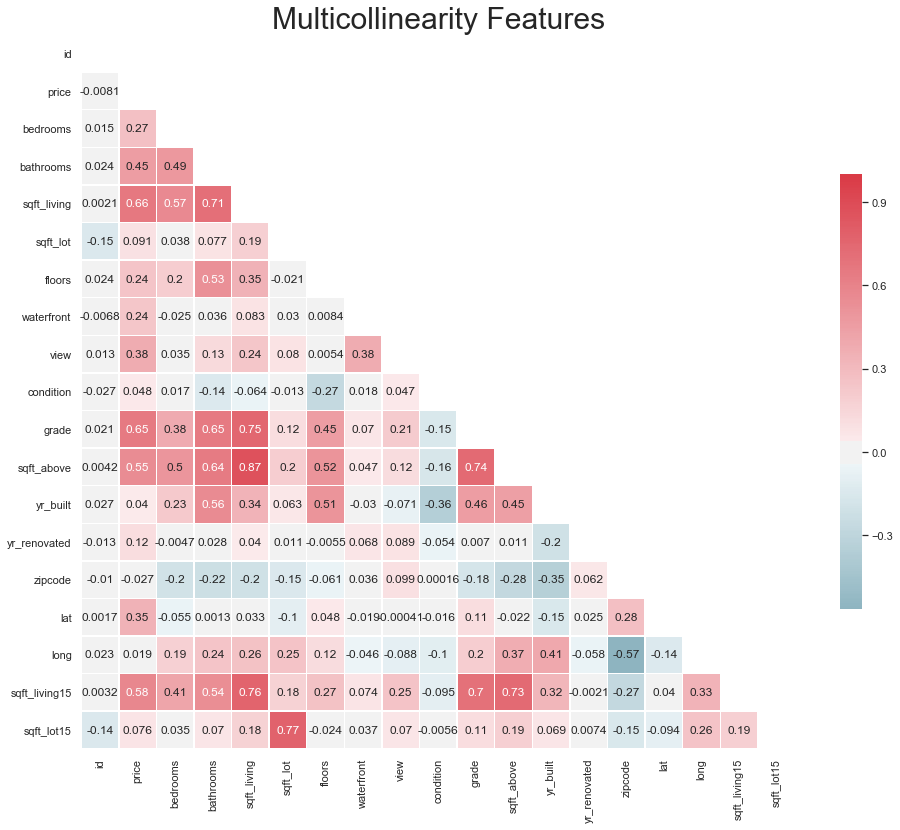

In [28]:

sns.set(style="whitegrid")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16,16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Multicollinearity Features', fontdict={'fontsize': 30})
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD28EE668>,
      dtype=object)

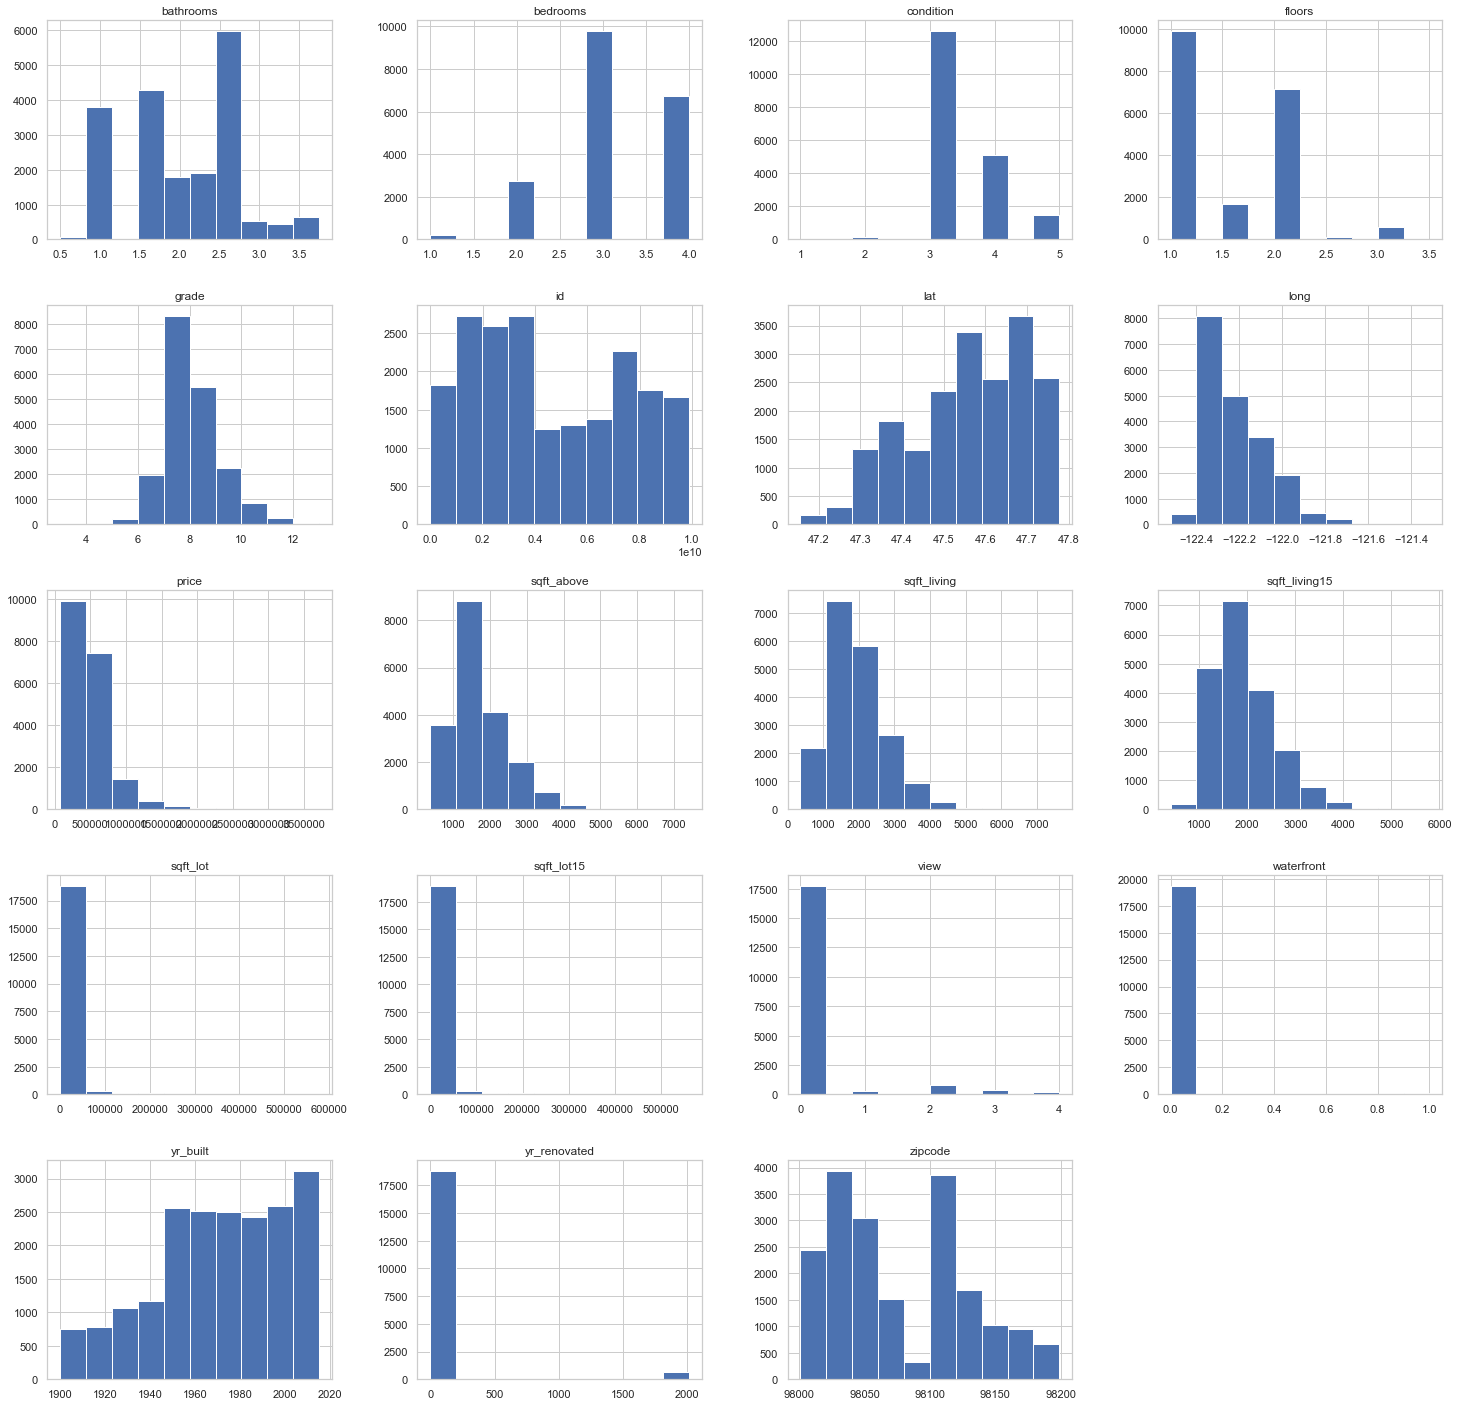

In [29]:
df.hist(figsize=(25,25))

We see a correlation in our heat map of sqft_living and sqft_above, therefore we are going to drop sqft_above.

In [30]:
df.drop('sqft_above', axis=1, inplace=True)

We are also at this point going to drop sqft_living15, and sqft_lot15, as there is not enough information to use them properly, we are also getting rid of the IDs, and date as we're at it as they are not important for our model.

In [31]:
df.drop(['id','sqft_living15','sqft_lot15', 'date'], axis=1, inplace=True)

We will also drop grade as it seems to exhibit multicollinearity with several features. 

In [32]:
df.drop(['grade'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 0 to 21596
Data columns (total 15 columns):
price            19475 non-null float64
bedrooms         19475 non-null int64
bathrooms        19475 non-null float64
sqft_living      19475 non-null int64
sqft_lot         19475 non-null int64
floors           19475 non-null float64
waterfront       19475 non-null float64
view             19475 non-null float64
condition        19475 non-null int64
sqft_basement    19475 non-null object
yr_built         19475 non-null int64
yr_renovated     19475 non-null float64
zipcode          19475 non-null int64
lat              19475 non-null float64
long             19475 non-null float64
dtypes: float64(8), int64(6), object(1)
memory usage: 2.4+ MB


In [34]:
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0

In [35]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


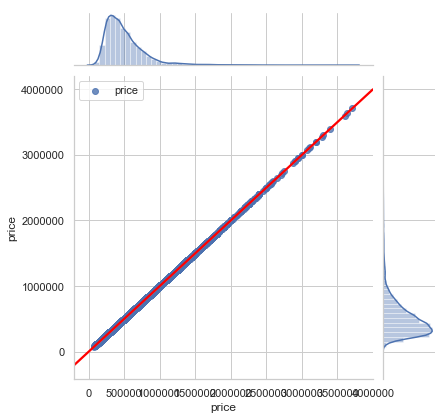

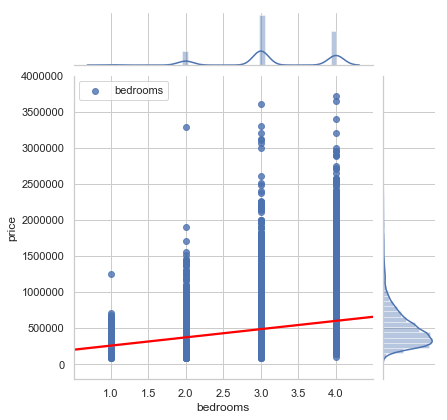

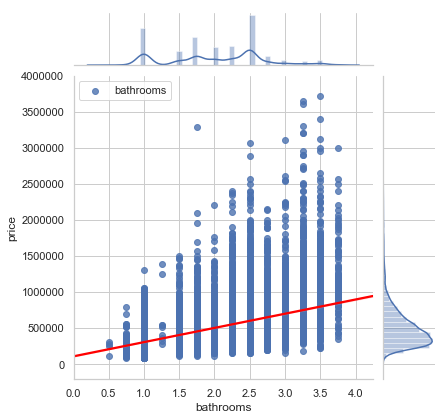

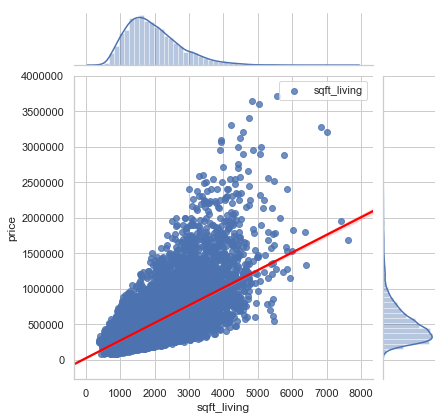

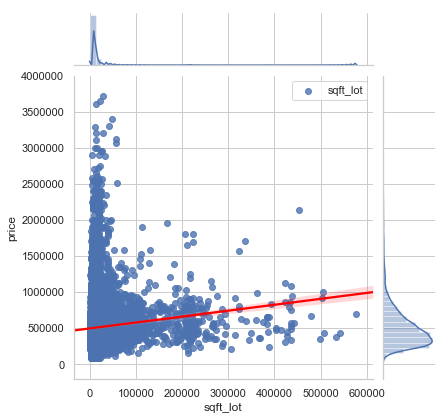

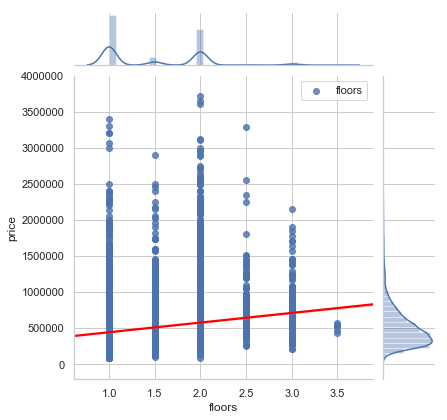

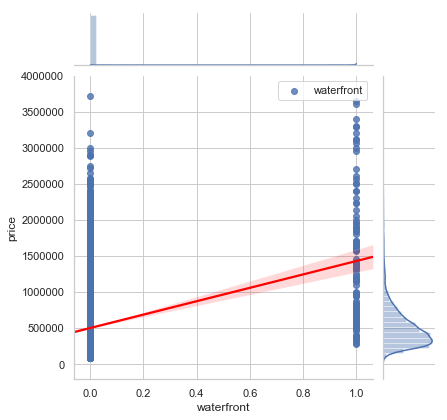

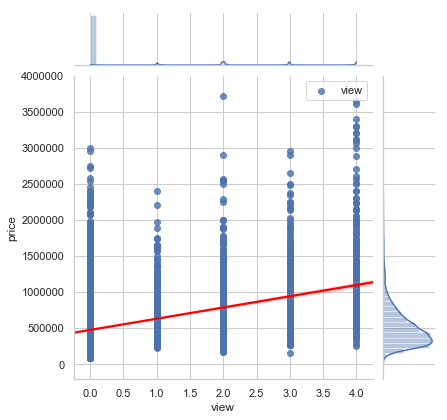

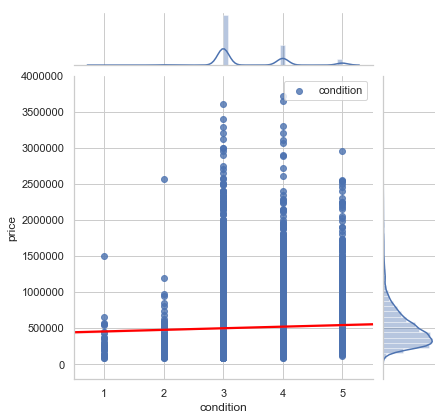

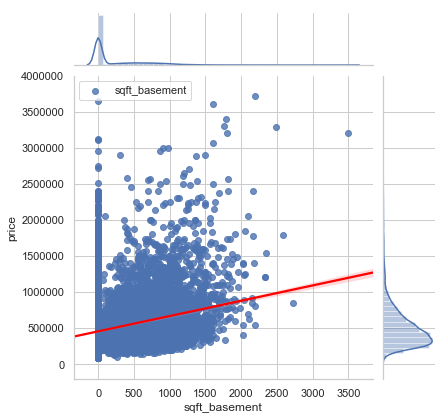

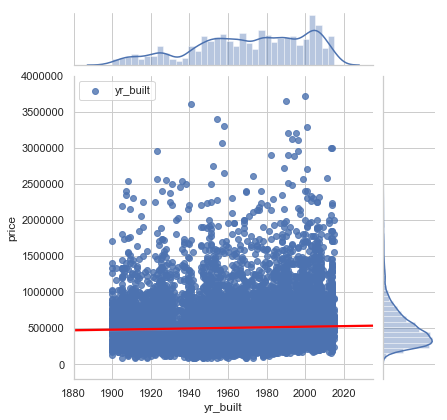

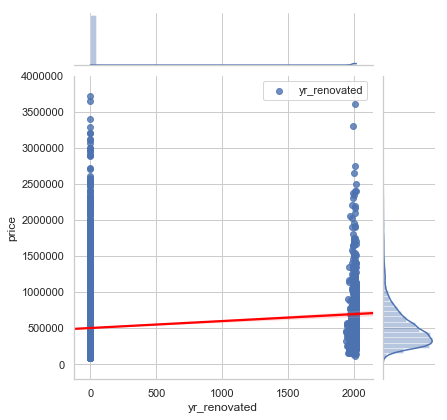

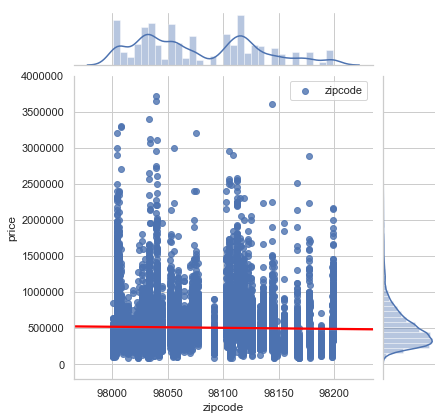

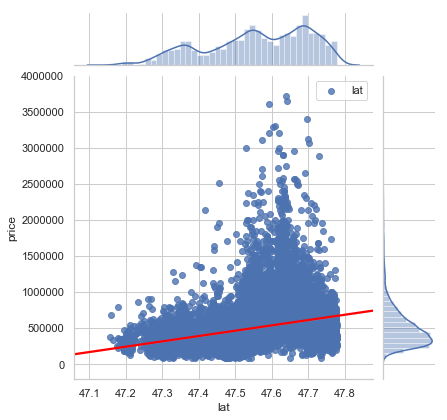

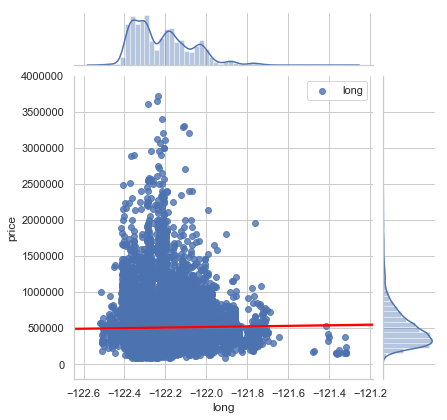

In [36]:

for column in df:
    sns.jointplot(x=column, y="price",
                 data=df,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

# Deciphering Location in Relation to Price

In [37]:
df.zipcode.value_counts()

98103    562
98038    560
98115    536
98117    523
98042    514
98052    505
98034    493
98023    471
98133    460
98118    449
98058    410
98059    406
98155    402
98006    396
98074    389
98125    380
98033    379
98053    376
98056    368
98027    352
98001    342
98126    341
98092    329
98116    314
98144    305
98029    303
98106    302
98075    301
98199    291
98065    273
        ... 
98107    244
98030    238
98004    237
98178    235
98008    231
98166    230
98177    226
98022    224
98112    221
98045    211
98040    193
98105    188
98002    184
98077    181
98019    176
98011    167
98108    165
98119    162
98005    135
98188    120
98014    115
98032    115
98070    112
98007    111
98109    100
98010     96
98102     94
98024     69
98148     56
98039     33
Name: zipcode, Length: 70, dtype: int64

Text(0.5, 1.0, 'Price According to GPS Location')

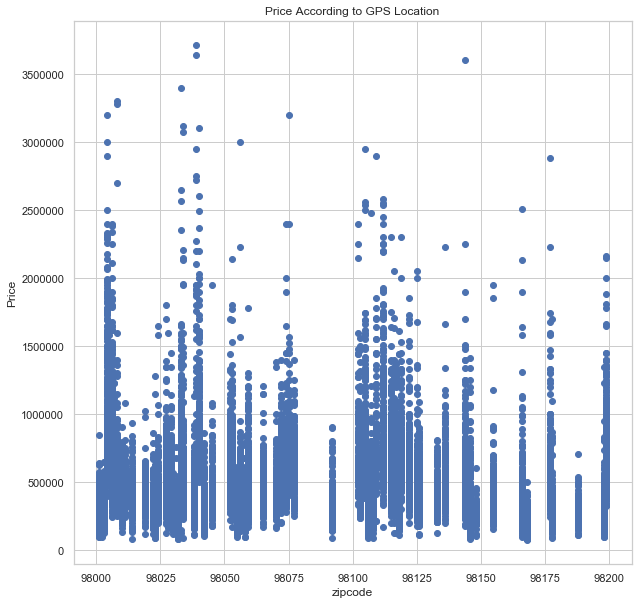

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(df['zipcode'], df['price'])

plt.xlabel('zipcode')
plt.ylabel('Price')
plt.title('Price According to GPS Location')

As we can see there is no direct correlation between zipcode and price, so let us look at GPS coordinates instead.

Text(0.5, 1.0, 'Price as related to GPS Location')

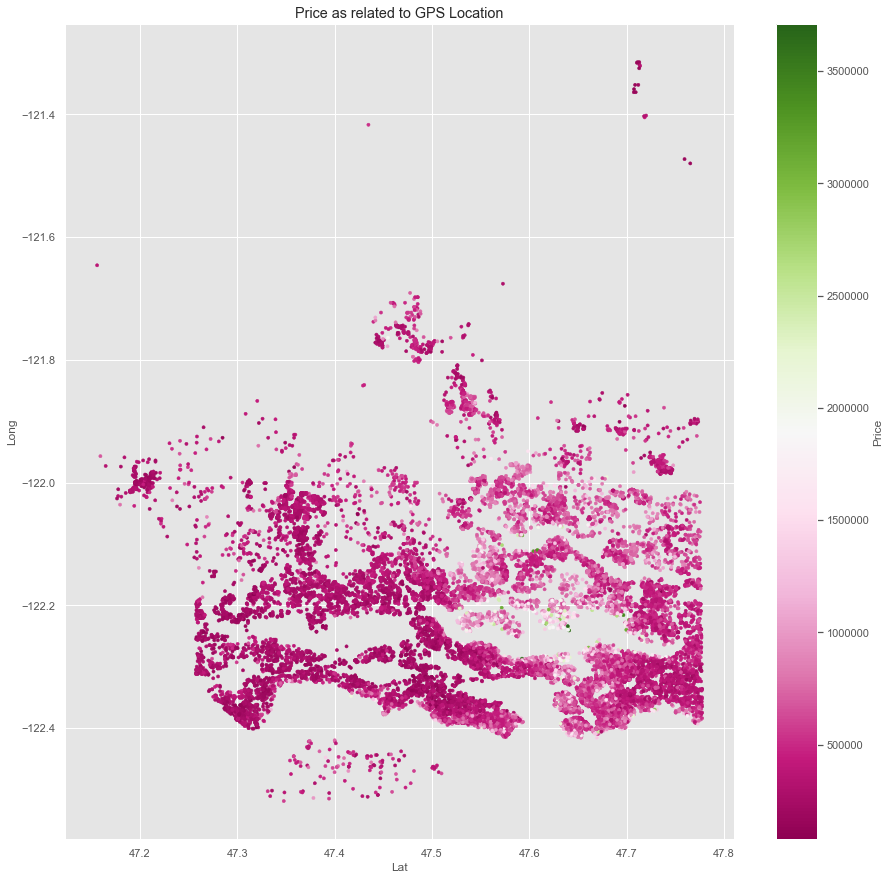

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
plt.scatter(df.lat, df.long, c=df.price, s=10, cmap='PiYG')
c = plt.colorbar()
c.set_label('Price')
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('Price as related to GPS Location')

Next we are going to use a method called spectal clustering which takes connected coordinates and pairs them into smaller groups.

In [40]:
X = df[['lat', 'long']]

In [41]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=20, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'Spectral Clustering of GPS Location (10 Clusters)')

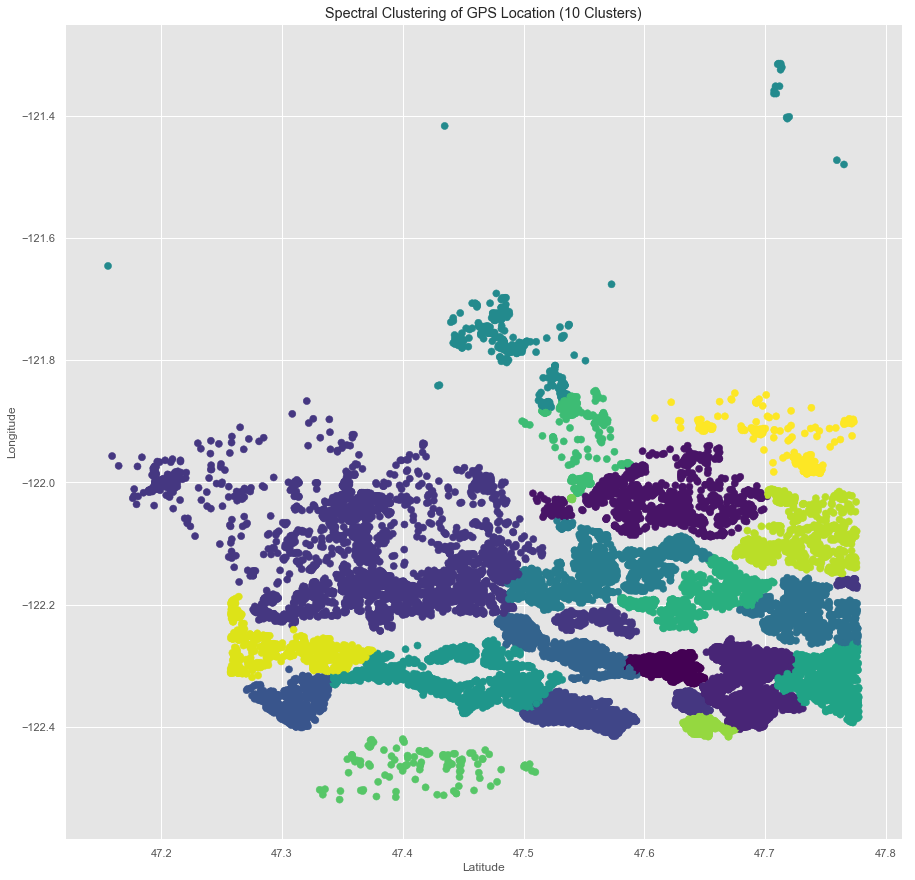

In [42]:
plt.figure(figsize=(15, 15))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Spectral Clustering of GPS Location (10 Clusters)')

Next lets take a look at the labels that cover our spectral clustering.

In [43]:
labels[:20]

array([ 6, 11,  7,  4,  1,  5, 10, 10,  3,  8,  2,  7,  1,  4, 19,  2,  3,
       18,  2,  3])

In [44]:
df['labellocation'] = labels

Next Lets create dummies for our locations, and drop lat long and zipcode as they are no longer relevant.

In [45]:
df.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,labellocation
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,0.0,1955,0.0,6
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,11
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,0.0,1933,0.0,7
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,4
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,1


# Dealing with Categorical Data

Lets start by handling the basement column by changing with basement to 1 and without basement to 0, then lets make dummies out of the columns.

In [48]:
#binning
bins = [-1 , 1 , df.sqft_basement.max()]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')

#make dummies
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement')
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

Lets do the same for yr_renovated

In [49]:
#binning
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']

df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')
#make dummies
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated')
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

Now the same for the rest of our Categorical Data

In [50]:
#Categorize
df.labellocation = df.labellocation.astype('category')
df.yr_built = df.yr_built.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.waterfront = df.waterfront.astype('category')

#Make Dummies

labellocation = pd.get_dummies(df.labellocation, prefix ='labellocation')
yr_built = pd.get_dummies(df.yr_built, prefix ='yr_built')
view = pd.get_dummies(df.view, prefix ='view')
condition = pd.get_dummies(df.condition, prefix='condition')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms')
floors = pd.get_dummies(df.floors, prefix='floors')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms')      
waterfront = pd.get_dummies(df.waterfront, prefix='waterfront')

#Add dummies remove original columns

df = df.join([waterfront, condition, bedrooms, floors, bathrooms, view, yr_built, labellocation])
df.drop(['waterfront','condition','bedrooms', 'floors', 'bathrooms', 'labellocation', 'view', 'yr_built'], axis=1, inplace=True)

In [51]:
df.head(10)

,price,sqft_living,sqft_lot,basement_0,basement_1,renovated_0,renovated_1,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,yr_built_1900,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,yr_built_1910,yr_built_1911,yr_built_1912,yr_built_1913,yr_built_1914,yr_built_1915,yr_built_1916,yr_built_1917,yr_built_1918,yr_built_1919,yr_built_1920,yr_built_1921,yr_built_1922,yr_built_1923,yr_built_1924,yr_built_1925,yr_built_1926,yr_built_1927,yr_built_1928,yr_built_1929,yr_built_1930,yr_built_1931,yr_built_1932,yr_built_1933,yr_built_1934,yr_built_1935,yr_built_1936,yr_built_1937,yr_built_1938,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1945,yr_built_1946,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1995,yr_built_1996,yr_built_1997,yr_built_1998,yr_built_1999,yr_built_2000,yr_built_2001,yr_built_2002,yr_built_2003,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,labellocation_0,labellocation_1,labellocation_2,labellocation_3,labellocation_4,labellocation_5,labellocation_6,labellocation_7,labellocation_8,labellocation_9,labellocation_10,labellocation_11,labellocation_12,labellocation_13,labellocation_14,labellocation_15,labellocation_16,labellocation_17,labellocation_18,labellocation_19
0,221900.0,1180,5650,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180000.0,770,10000,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,8080,1,0,1,0,1,0

In [52]:
df.describe()

,price,sqft_living,sqft_lot,basement_0,basement_1,renovated_0,renovated_1,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,yr_built_1900,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,yr_built_1910,yr_built_1911,yr_built_1912,yr_built_1913,yr_built_1914,yr_built_1915,yr_built_1916,yr_built_1917,yr_built_1918,yr_built_1919,yr_built_1920,yr_built_1921,yr_built_1922,yr_built_1923,yr_built_1924,yr_built_1925,yr_built_1926,yr_built_1927,yr_built_1928,yr_built_1929,yr_built_1930,yr_built_1931,yr_built_1932,yr_built_1933,yr_built_1934,yr_built_1935,yr_built_1936,yr_built_1937,yr_built_1938,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1945,yr_built_1946,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1995,yr_built_1996,yr_built_1997,yr_built_1998,yr_built_1999,yr_built_2000,yr_built_2001,yr_built_2002,yr_built_2003,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,labellocation_0,labellocation_1,labellocation_2,labellocation_3,labellocation_4,labellocation_5,labellocation_6,labellocation_7,labellocation_8,labellocation_9,labellocation_10,labellocation_11,labellocation_12,labellocation_13,labellocation_14,labellocation_15,labellocation_16,labellocation_17,labellocation_18,labellocation_19
count,1.947500e+04,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.0000

# Feature Scaling and Normalization

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


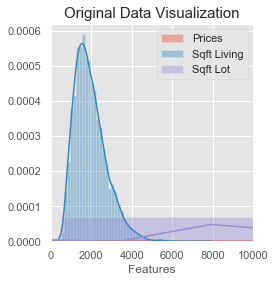

In [53]:
#distplot of our raw data
plt.figure(figsize=(8,4))
plt.subplot(122)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Data Visualization', fontdict={'fontsize': 15})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

# Normalize our data using Log Transformation

Distplot of our Normalized Data representing a much more accurate picture of how the variables relate. They all show normal distribution which is a requirement for Linear Regression.

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


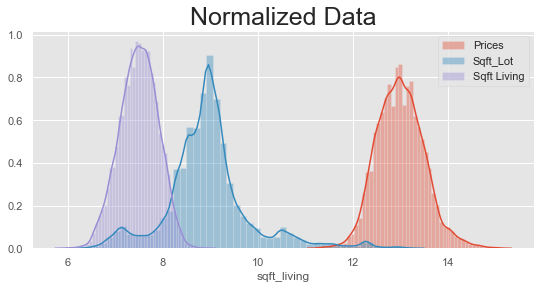

In [54]:
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

plt.figure(figsize=(9,4))
sns.distplot(price, label='Prices')
sns.distplot(sqft_lot, label = 'Sqft_Lot')
sns.distplot(sqft_living, label = 'Sqft Living')
plt.title('Normalized Data', fontdict={'fontsize' : 25})
plt.legend()
plt.show()

# Min-Max Scale our data

C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


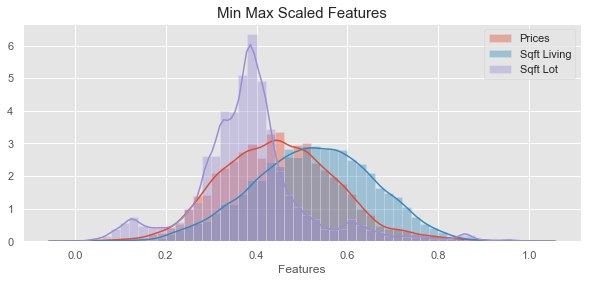

In [55]:
df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
df['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Min Max Scaled Features', fontdict={'fontsize': 15})
plt.xlabel('Features')
plt.legend()
plt.show()

# Creating a Linear Regression Model

# Linear Regression Formula

In [56]:
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    AVGPP = linreg.predict(X_test)
    
    print('R^2 Score:', linreg.score(X, y))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, AVGPP)))
    print('MAE:', metrics.mean_absolute_error(y_test, AVGPP))
    
    print('AVG Predicted Price:', (AVGPP.mean()))
    print('AVG Actual Price:', y_test.mean())
    return (linreg, AVGPP, y_test)

    

In [57]:
X = df.drop(['price'], axis=1)
y = df.price

In [58]:
linear_regression(X,y)

R^2 Score: 0.7492369875629601
RMSE: 0.06458195932803333
MAE: 0.047920917435288035
AVG Predicted Price: 0.44928215932601234
AVG Actual Price: 0.44928674571949667


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 array([0.62561035, 0.52087402, 0.54760742, ..., 0.43817139, 0.40350342,
        0.61834717]),
 7772     0.696725
 5714     0.508084
 19011    0.577252
 16443    0.605976
 14028    0.604372
 13524    0.243809
 2990     0.365506
 3324     0.364289
 10172    0.435911
 21502    0.467781
 7460     0.323425
 16561    0.460034
 2414     0.337054
 11475    0.380441
 13946    0.490220
 13608    0.806913
 18947    0.453781
 6303     0.589478
 775      0.435917
 6560     0.584316
 12181    0.510406
 7129     0.270830
 7544     0.348795
 15304    0.376593
 17679    0.344443
 15598    0.403098
 5362     0.490220
 9139     0.498557
 13434    0.621485
 8871     0.521715
            ...   
 371      0.361428
 4268     0.636686
 446      0.668191
 15209    0.348795
 18356    0.383478
 14675    0.575838
 5508     0.517250
 1972     0.435917
 3811     0.493695
 10303    0.571492
 17349    0.421986
 20580    0.601

# Stepwise Selection : Filtering our significant predictors

In [59]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [60]:
result = stepwise_selection(X, y, verbose = True)

Add  floors_1.0                     with p-value 0.0
Add  basement_0                     with p-value 0.0
Add  view_0.0                       with p-value 0.0
Add  labellocation_12               with p-value 0.0
Add  basement_1                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  labellocation_2                with p-value 0.0
Add  labellocation_0                with p-value 0.0
Add  labellocation_3                with p-value 2.41209e-264
Add  labellocation_10               with p-value 4.1219e-289
Add  labellocation_18               with p-value 0.0
Add  labellocation_5                with p-value 0.0
Add  labellocation_16               with p-value 4.64665e-98
Add  waterfront_1.0                 with p-value 3.29323e-101
Drop floors_1.0                     with p-value 0.0528823


C:\Users\Sanjay\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  labellocation_6                with p-value 1.67689e-68
Add  labellocation_9                with p-value 4.30471e-51
Add  labellocation_19               with p-value 1.07026e-43
Add  labellocation_11               with p-value 1.87974e-40
Add  bedrooms_2                     with p-value 7.20505e-30
Add  condition_3                    with p-value 4.46723e-29
Add  bathrooms_3.25                 with p-value 4.67039e-27
Add  view_4.0                       with p-value 1.89013e-27
Add  bathrooms_3.5                  with p-value 2.72603e-24
Add  bathrooms_3.75                 with p-value 1.959e-23
Add  renovated_0                    with p-value 3.48431e-22
Add  renovated_1                    with p-value 2.66036e-296
Add  labellocation_14               with p-value 4.46301e-22
Add  sqft_lot                       with p-value 2.27776e-19
Add  floors_1.0                     with p-value 6.533e-18
Add  condition_2                    with p-value 3.50228e-16
Add  yr_built_2014         

In [61]:
linreg=LinearRegression()
selector = RFE(linreg, n_features_to_select = 87)
selector = selector.fit(X, y)
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=87, step=1, verbose=0)

In [62]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 1.82433628e+11  1.82433628e+11  1.82433628e+11  1.82433628e+11
  1.82433628e+11 -1.50194982e+11 -1.50194982e+11 -1.50194982e+11
 -1.50194982e+11 -1.22075117e+12 -1.22075117e+12 -1.22075117e+12
 -1.22075117e+12 -1.22075117e+12 -1.22075117e+12  2.76827693e+10
  2.76827693e+10  2.76827693e+10  2.76827693e+10  2.76827693e+10
  2.76827693e+10  2.76827693e+10  2.76827693e+10  2.76827693e+10
  2.76827693e+10  2.76827693e+10  2.76827693e+10  2.76827693e+10
  2.76827693e+10  7.35814101e+10  7.35814101e+10  7.35814101e+10
  7.35814101e+10  7.35814101e+10  5.26976585e-02  6.13613129e-02
  4.97360229e-02  6.79264069e-02  6.53929710e-02  4.35314178e-02
  5.89523315e-02  3.82966995e-02  4.57224846e-02  3.88040543e-02
  2.69246101e-02  3.76081467e-02  3.22217941e-02  4.45804596e-02
  4.02216911e-02  4.19311523e-02  5.29036522e-02  5.95827103e-02
  5.10742664e-02  4.22344208e-02  4.31232452e-02  3.50232124e-02
  2.78487206e-02  4.48522568e-02  2.97765732e-02  3.39488983e-02
  3.38401794e-02  2.80318

In [63]:
dfresult = df[result[:87]]

In [64]:
linreg.fit(dfresult, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Statistics Following our Stepwise Selection

In [66]:
print('R^2 Score:',linreg.score(dfresult, y))

R^2 Score: 0.748433249096686


# Cross Validation

In [67]:
crosval = cross_val_score(linreg, X, y, cv=15, scoring="r2")
print(crosval)
print('Final Accuracy:',round(sum(crosval)/len(crosval),2)*100, '%')

[0.74274953 0.74908497 0.7492718  0.7463869  0.75505081 0.71087447
 0.71978483 0.73196818 0.7428795  0.74427223 0.76798516 0.757121
 0.75473619 0.7579717  0.71452494]
Final Accuracy: 74.0 %


# Further feature selection, with all p values below .05

In [68]:
def feature_selection(X, y):
    features = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(features.pvalues, columns=['p'])
    featureslist = list(pvalues[pvalues.p < 0.05].index)
    return featureslist

In [69]:
SigFeats = feature_selection(X, y)

In [70]:
df.shape

(19475, 179)

In [71]:
X = df[SigFeats]
y = df.price
linreg, y_pred, y_test = linear_regression(X, y)

R^2 Score: 0.7488121587080945
RMSE: 0.06508273897953977
MAE: 0.04815477324118682
AVG Predicted Price: 0.4496484557336238
AVG Actual Price: 0.44912000085964643


In [72]:
crosval = cross_val_score(linreg, X, y, cv=15, scoring="r2")
print(crosval)
print('Final Accuracy:',round(sum(crosval)/len(crosval),2)*100, '%')

[0.74346973 0.75062639 0.75093887 0.74719233 0.75588718 0.71174066
 0.72124559 0.73173735 0.74389096 0.74479677 0.76914017 0.75758537
 0.75487159 0.75841628 0.71570067]
Final Accuracy: 74.0 %


In [73]:
features = pd.DataFrame(linreg.coef_, index=SigFeats, columns=['Significant Features'])
features.sort_values(by='Significant Features', ascending=False).head(20)

,Significant Features
bedrooms_1,2.386054e+10
bedrooms_2,2.386054e+10
bedrooms_3,2.386054e+10
bedrooms_4,2.386054e+10
sqft_living,5.324500e-01
labellocation_12,1.223145e-01
labellocation_0,1.017456e-01
labellocation_16,9.878159e-02
waterfront_1.0,8.672748e-02
bathrooms_3.75,8.255768e-02


# Significant Coefficients

Here we can see that our most significant relevant feature is bedrooms, which is a well known correlation to the cost of a house. Our next would be sqft_living, which makes sense, the larger the living space the more expensive the house. Next would be location, which shows us that the houses in this area are grouped by price range, which is typical of neighborhoods and housing market. Next we see that the Condition of the House is also a very important factor, which makes sense because anything in a better condition costs more than something that is dirty or broken, the same holds true for houses. We also see that wether the house is a waterfront is a very significant feature, as houses that are waterfront are generally more expensive. Finally we see that the year built has a significant impact on house price in a manner of the older the host the more correlated it is to the price, which makes sense because housing prices appreciate.

# Model Explanation

Our model begins by performing a train test split and running a linear regression on the entire dataset. Here we received the following results:

R^2 Score: 0.776631071005764

RMSE: 0.06170770344746861

MAE: 0.046717937942768996

AVG Predicted Price: 0.4519654934747938

AVG Actual Price: 0.4535891010251738

Which are pretty accurate and a good outcome.

We then perform step-wise selection, our R2 score following stepw-sise selection is: 0.748433249096686

Next we performed Cross Validation, and received a 74% accuracy. 

We then performed another feature selection which depicted an accuracy of 74% as well.